# Initial adjusts and data management

## Imports

In [ ]:
import os
import gzip
import idx2numpy
import matplotlib.pyplot as plt
import joblib
import numpy as np
import tensorflow as tf
from PIL import Image, ImageOps
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

## MNIST bynaries

### Import, extract and load dataset

In [ ]:
mnist_train_dir = '/'
mnist_test_dir = '/'

files = [os.path.join(mnist_train_dir, 'train-images-idx3-ubyte.gz'), os.path.join(mnist_train_dir, 'train-labels-idx1-ubyte.gz'),
         os.path.join(mnist_test_dir, 'test_t10k-images-idx3-ubyte.gz'), os.path.join(mnist_test_dir, 'test_t10k-labels-idx1-ubyte.gz')]

files_bin = []

def gz_extractor(gz_file_path):
    destination_path = gz_file_path.replace('.gz', '')
    files_bin.append(destination_path)
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(destination_path, 'wb') as f_out:
            f_out.write(f_in.read())

def load_idx(images_path, labels_path):
    images = idx2numpy.convert_from_file(images_path)
    labels = idx2numpy.convert_from_file(labels_path)
    return images, labels

for file_path in files:
    gz_extractor(file_path)

train_images, train_labels = load_idx(files_bin[0], files_bin[1])
test_images, test_labels = load_idx(files_bin[2], files_bin[3])

### Plot dataset

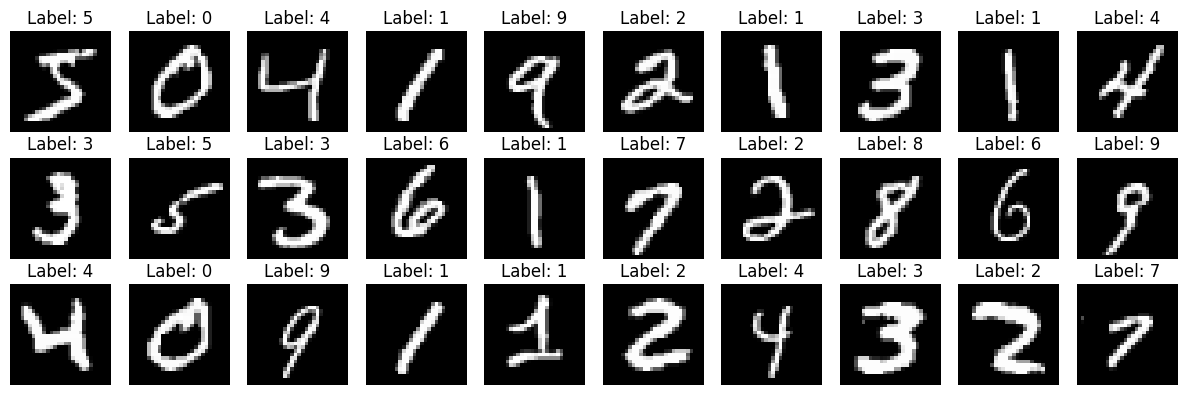

In [ ]:
images_by_line = 10
plt.figure(figsize=(12, 4))

for i in range(3 * images_by_line):
    plt.subplot(3, images_by_line, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {train_labels[i]}')

plt.tight_layout()
plt.show()

## Normalizing, reshaping data and applying one hot encoding on labels

In [ ]:
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

train_images = train_images_normalized.reshape(-1, 28, 28, 1)
test_images = test_images_normalized.reshape(-1, 28, 28, 1)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# CNN

## Configuring and training

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1447 - accuracy: 0.9549 - val_loss: 0.0387 - val_accuracy: 0.9873
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0457 - accuracy: 0.9865 - val_loss: 0.0498 - val_accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0271 - val_accuracy: 0.9921
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0451 - val_accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0340 - val_accuracy: 0.9897


## Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0340 - accuracy: 0.9897

Test accuracy: 0.9897000193595886


## Saving model

In [ ]:
model.save('/cnn_mnist_model.h5')

# Tests

## Loading trained model

In [ ]:
model = tf.keras.models.load_model('/content/model/cnn_mnist_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              